In [3]:
# lets begin by pulling down our git repo
# !git clone https://github.com/NSCC-COGS/Aestheta.git # if you want to clone the whole repo
!pip install git+https://github.com/NSCC-COGS/Aestheta.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 7.8MB/s 


0 0 0


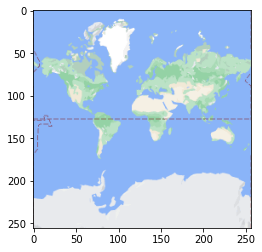

In [5]:
# now lets import our code and see if getTile() is working
from aestheta import core
core.getTile(show=True)

In [ ]:
# ok, so today lets try some thing kind of crazy.. 
# lets make an iterator that BUILDS a google satellite image
# lets do this by grabbing all the tiles of a given zoom level 
# and appending their average RGB values to an array

# at zoom level 8 (which would be 256x256), 
# this array may look a lot like 'google_sat' zoom 0! 

# note, this will access google map api 65536 times!
# google may not like this.. 
# and it will take awhile

# consider this a stress test for the google maps API
# we may consider using this data in future to train models!

import numpy as np

zoom = 8
size = 2**zoom
earth = np.zeros((size,size,3), dtype=int)
print(size)

for x in range(0,size):
  for y in range(0,size):
    print(x,y, zoom)
    try:
      tile = core.getTile(xyz=[x,y,zoom],source='google_sat')
      earth[y,x,0]= tile[:,:,0].mean()
      earth[y,x,1]= tile[:,:,1].mean()
      earth[y,x,2]= tile[:,:,2].mean()
    except Exception as e: 
      print(e) # in some cases, no tile exists - such as in the ocean or at the poles
      # pass

# this will work (faster) with zoom levels < 8
# but note those images wont have the same size as the zoom 0 WMS tile
# more on that below... 

In [ ]:
# THIS is a hack that can force google colab to stay open
# you can run the block to force the previous block to keep running
while True:pass 

KeyboardInterrupt: ignored

0 255


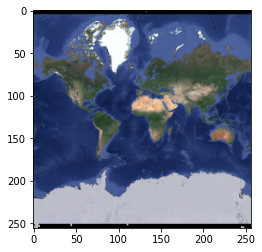

In [ ]:
# ok! Now lets plot this crazy image we've compiled

from matplotlib import pyplot as plt

print(earth.min(), earth.max())

plt.imshow(earth)
plt.show()

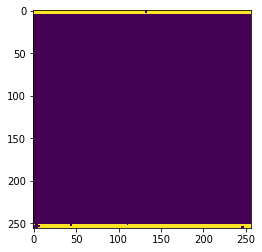

In [ ]:
# lets look at which pixels stayed 0
# ie, no image was loaded and averaged
earth0 = earth.sum(axis=2)==0
plt.imshow(earth0,interpolation = 'nearest')
plt.show()

0 0 0


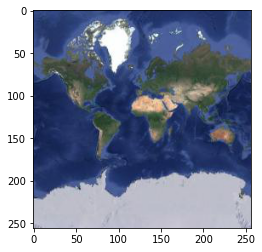

In [ ]:
# lets compare this image to the zoom 0 'google_sat'
earthG = core.getTile(source = 'google_sat')
plt.imshow(earthG)
plt.show()

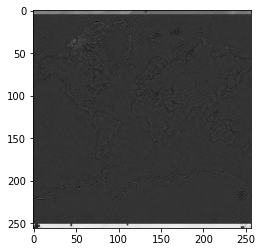

In [ ]:
# lets look at the mean difference across axis 2 (the image bands)
earth_diff = (earthG-earth).mean(axis=2)
plt.imshow(earth_diff, cmap='gray')
plt.show()

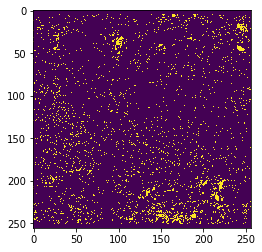

In [ ]:
# and lets see which pixels are idential (where difference == 0)
earth_diff0 = earth_diff==0
plt.imshow(earth_diff0,interpolation = 'nearest')
plt.show()

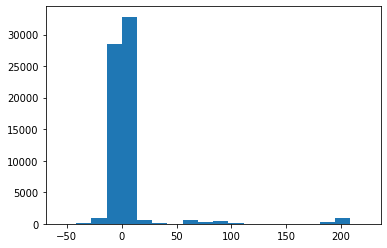

In [ ]:
# lets have a peek at a histogram
# this will show us the distribution of mean pixel differences 
# between our compiled image and 'google_sat' zoom 0
plt.hist(earth_diff.flatten(),bins=20)
plt.show()

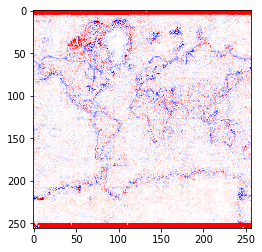

In [ ]:
# now by interpreting the histogram, we can scale the max/min of the range for display
# note for some more information on matplotlib color ramps, check this out: 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.imshow(earth_diff, vmin = -20, vmax = 20, cmap='bwr')
plt.show()